RUN_DIR = /home/skataoka26/COSC_498/miniMXE/results/spec_roi100_nowarm_sram8MB_rd4_wr2_jans4MB_rd6_wr17_20250919T230616Z
Loaded benches: ['520_omnetpp_r', '531_deepsjeng_r', '541_leela_r', '648_exchange2_s']


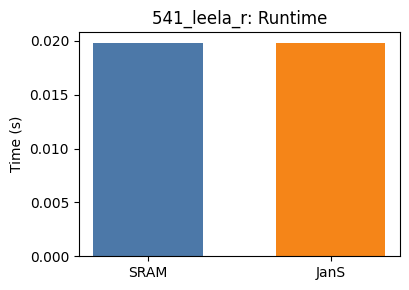

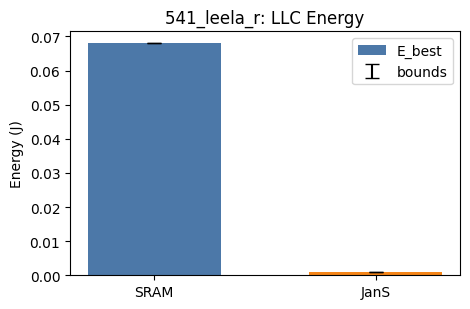

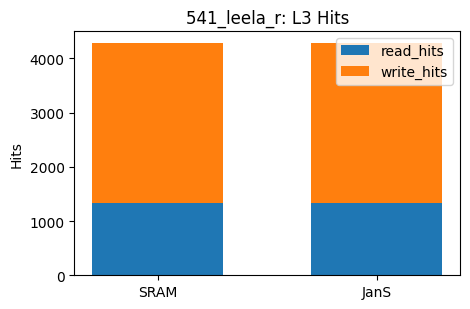

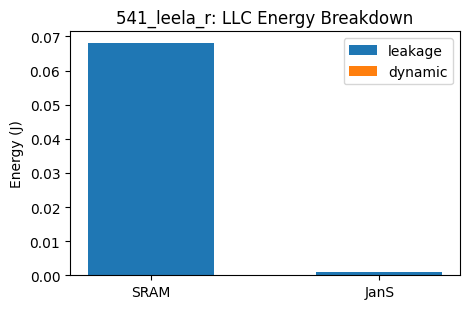

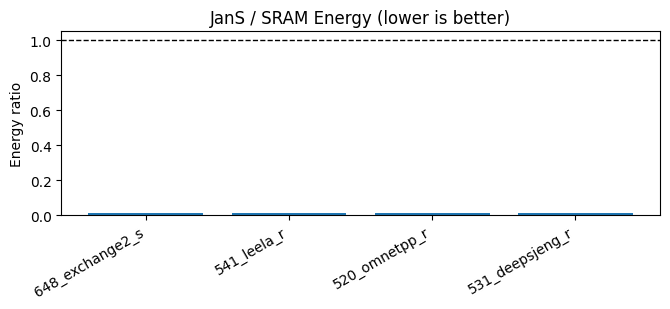

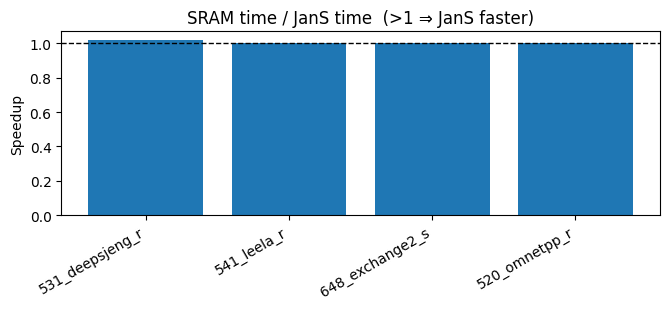

Corr (FEATURES vs SNIPER outputs) — SRAM


E_best_J  energy_exact_J  time_s    ipc  miss_rate_db  \
read_unique          -0.511          -0.511  -0.511  0.103        -0.990   
write_unique          0.996           0.996   0.996 -0.865         0.695   
read_entropy          0.497           0.497   0.497 -0.815        -0.366   
write_entropy         0.968           0.968   0.968 -0.984         0.410   
read_footprint90      0.968           0.968   0.968 -0.984         0.409   
write_footprint90     1.000           1.000   1.000 -0.899         0.642   

                   write_hit_share  avg_l3_hit_ns  l3_uncore_requests  \
read_unique                 -0.526          0.526              -0.529   
write_unique                -0.380          0.380               0.997   
read_entropy                -0.999          0.999               0.479   
write_entropy               -0.670          0.670               0.963   
read_footprint90            -0.671          0.671               0.962   
write_footprint90           -0.445          0.445               1.000   

                   l3_accesses  l3_misses_db  l3_read_hits  l3_write_hits  \
read_unique             -0.527        -0.528         0.999          0.370   
write_unique             0.997         0.997        -0.546         -0.969   
read_entropy             0.481         0.479         0.536         -0.627   
write_entropy            0.963         0.963        -0.230         -0.995   
read_footprint90         0.963         0.962        -0.229         -0.995   
write_footprint90        1.000         1.000        -0.485         -0.984   

                   l3_writebacks  l3_evictions  
read_unique               -0.529        -0.529  
write_unique               0.998         0.998  
read_entropy               0.478         0.478  
write_entropy              0.963         0.963  
read_footprint90           0.962         0.962  
write_footprint90          1.000         1.000

Corr (FEATURES vs SNIPER outputs) — JanS


E_best_J  energy_exact_J  time_s    ipc  miss_rate_db  \
read_unique          -0.511          -0.511  -0.510  0.103        -0.990   
write_unique          0.996           0.996   0.996 -0.865         0.695   
read_entropy          0.497           0.497   0.497 -0.815        -0.366   
write_entropy         0.968           0.968   0.968 -0.984         0.410   
read_footprint90      0.968           0.968   0.968 -0.984         0.409   
write_footprint90     1.000           1.000   1.000 -0.899         0.642   

                   write_hit_share  avg_l3_hit_ns  l3_uncore_requests  \
read_unique                 -0.527         -0.527              -0.529   
write_unique                -0.378         -0.378               0.997   
read_entropy                -0.999         -0.999               0.479   
write_entropy               -0.669         -0.669               0.963   
read_footprint90            -0.670         -0.670               0.962   
write_footprint90           -0.443         -0.443               1.000   

                   l3_accesses  l3_misses_db  l3_read_hits  l3_write_hits  \
read_unique             -0.527        -0.528         0.999          0.370   
write_unique             0.997         0.997        -0.546         -0.969   
read_entropy             0.481         0.479         0.535         -0.627   
write_entropy            0.963         0.963        -0.231         -0.995   
read_footprint90         0.963         0.962        -0.230         -0.995   
write_footprint90        1.000         1.000        -0.485         -0.984   

                   l3_writebacks  l3_evictions  
read_unique               -0.529        -0.529  
write_unique               0.998         0.998  
read_entropy               0.478         0.478  
write_entropy              0.963         0.963  
read_footprint90           0.962         0.962  
write_footprint90          1.000         1.000

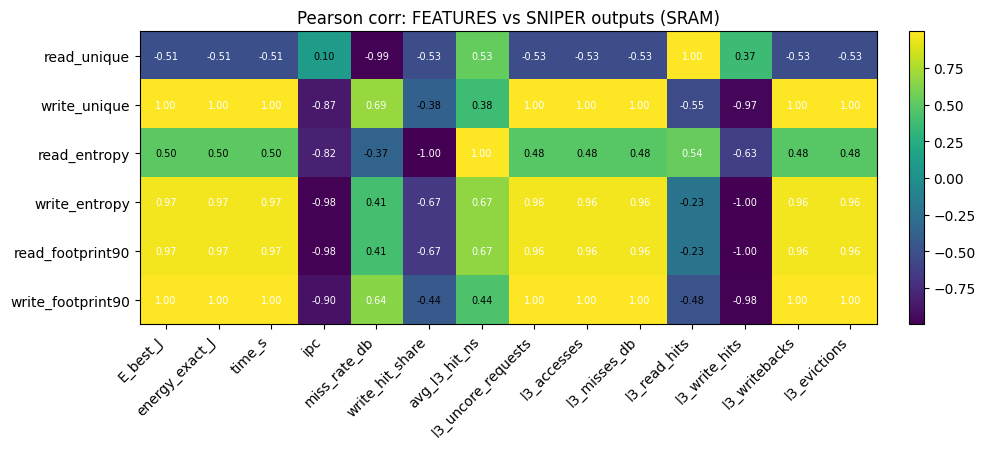

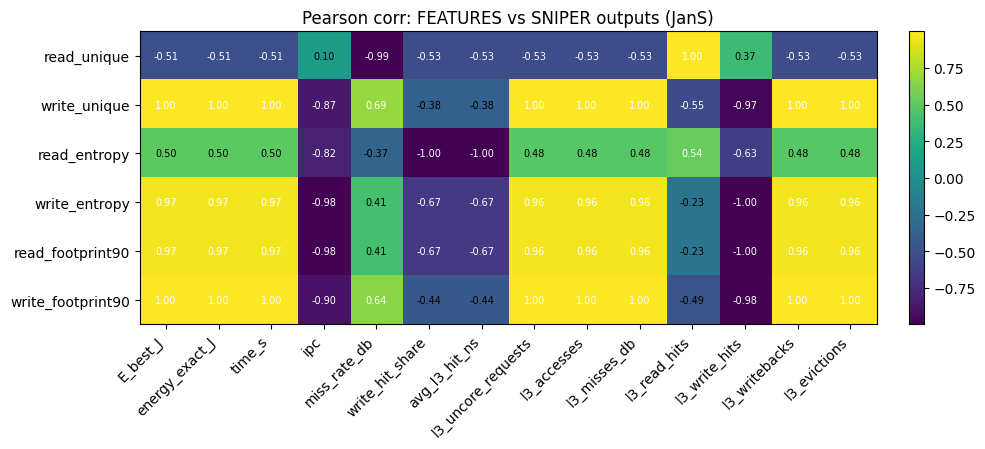

Corr (FEATURES vs RATIOS/DELTAS, JanS vs SRAM)


E_ratio_JanS_over_SRAM  time_ratio_JanS_over_SRAM  \
read_unique                        -0.481                      0.560   
write_unique                        0.992                     -0.999   
read_entropy                        0.526                     -0.446   
write_entropy                       0.976                     -0.952   
read_footprint90                    0.976                     -0.952   
write_footprint90                   0.999                     -0.999   

                   missrate_delta  avg_hit_ns_delta  write_hit_share_delta  
read_unique                -0.529            -0.527                 -0.529  
write_unique                0.998            -0.378                  0.998  
read_entropy                0.478            -0.999                  0.478  
write_entropy               0.963            -0.669                  0.963  
read_footprint90            0.962            -0.670                  0.962  
write_footprint90           1.000            -0.444                  1.000

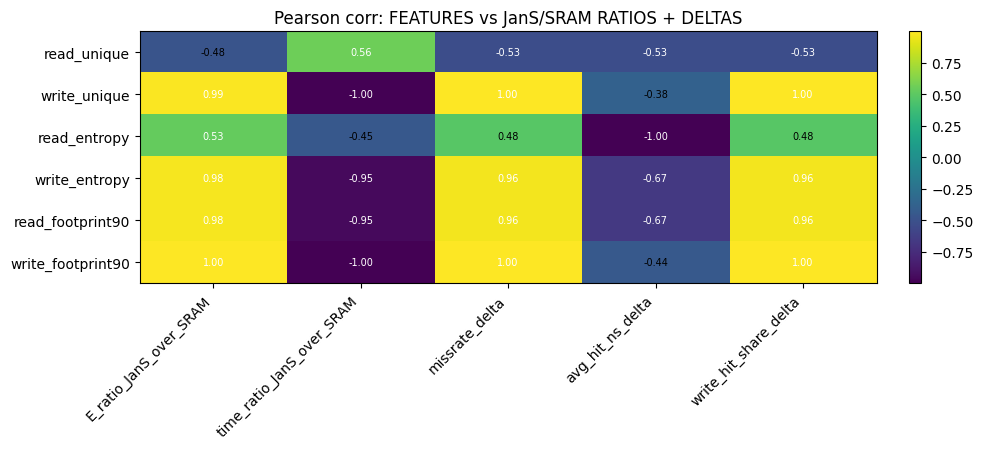

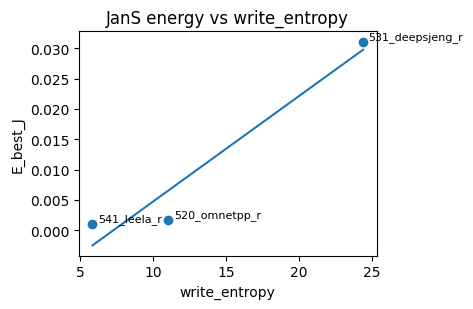

slope=0.00174, R^2=0.937


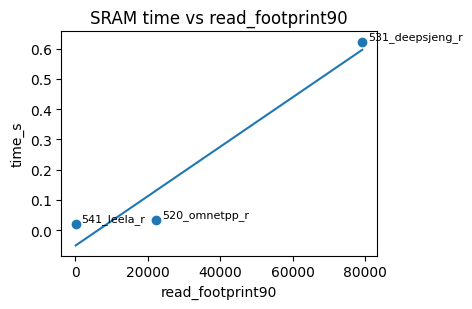

slope=8.171e-06, R^2=0.937


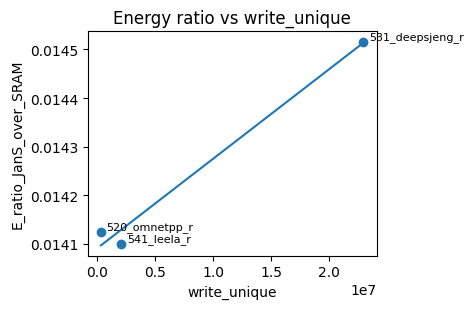

slope=1.846e-11, R^2=0.984
Done.


In [33]:
# ===== 01_data_exploration: FEATURES ↔ SNIPER OUTPUTS (ABS PATHS, one cell) =====
# - Loads per-bench CSVs written by energy_ed2p_v4.py (output_<bench>/*)
# - Loads features.csv (read/write uniques, entropy, footprint)
# - Builds per-config and per-bench tables of SNIPER outputs
# - Correlates FEATURES against SNIPER outputs (SRAM and JanS separately)
# - Also correlates FEATURES against JanS/SRAM RATIOS (energy, time) + DELTAS
# - Plots bar charts, heatmaps, and example scatters
#
# Edit RUN_ID only if you switch runs.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# -------------------
# CONFIG (ABS PATHS)
# -------------------
BASE   = Path("/home/skataoka26/COSC_498/miniMXE")
RUN_ID = "spec_roi100_nowarm_sram8MB_rd4_wr2_jans4MB_rd6_wr17_20250919T230616Z"
RUN_DIR = BASE / "results" / RUN_ID
FEATURES_CSV = BASE / "data" / "features.csv"

# pick a bench for the per-bench plots (underscore form)
BENCH_TO_PLOT = "541_leela_r"
C_SRAM = "#4C78A8"
C_JANS = "#F58518"

# -------------------
# helpers
# -------------------
def num(s):
    return pd.to_numeric(s, errors="coerce")

def bench_under_to_dot(b):
    # "520_omnetpp_r" -> "520.omnetpp_r"
    return b.replace("_", ".", 1)

def load_outputs(run_dir):
    out_dirs = sorted(run_dir.glob("output_*"))
    if not out_dirs:
        raise FileNotFoundError(f"No output_* directories in {run_dir}")

    energy_rows, summary_rows = [], []
    for od in out_dirs:
        e_csv = od / "energy_bounds.csv"
        s_csv = od / "summary.csv"
        if e_csv.is_file():
            try:
                e = pd.read_csv(e_csv)
                if "benchmark" not in e.columns:
                    # derive from output_<bench> folder name
                    e["benchmark"] = od.name.replace("output_", "")
                e["benchmark"] = e["benchmark"].astype(str)
                e["config"] = e["config"].astype(str).str.strip()
                energy_rows.append(e)
            except Exception as ex:
                print(f"[WARN] failed to read {e_csv}: {ex}")
        if s_csv.is_file():
            try:
                s = pd.read_csv(s_csv)
                if "benchmark" not in s.columns:
                    s["benchmark"] = od.name.replace("output_", "")
                s["benchmark"] = s["benchmark"].astype(str)
                s["config"] = s["config"].astype(str).str.strip()
                summary_rows.append(s)
            except Exception as ex:
                print(f"[WARN] failed to read {s_csv}: {ex}")

    if not energy_rows:
        raise RuntimeError("No energy_bounds.csv found.")
    if not summary_rows:
        raise RuntimeError("No summary.csv found.")

    energy = pd.concat(energy_rows, ignore_index=True)
    summary = pd.concat(summary_rows, ignore_index=True)

    # numeric coercion for energy
    for col in [
        "time_s","leak_J","leak_W","energy_exact_J","dyn_lower_nJ","dyn_upper_nJ",
        "l3_accesses","l3_misses_db","l3_read_hits","l3_write_hits","l3_writebacks","l3_evictions"
    ]:
        if col in energy.columns:
            energy[col] = num(energy[col])

    # recompute bounds (safer than trusting file if anything changed)
    if {"dyn_lower_nJ","dyn_upper_nJ","leak_J"}.issubset(energy.columns):
        energy["E_lo_J"] = energy["dyn_lower_nJ"]*1e-9 + energy["leak_J"]
        energy["E_hi_J"] = energy["dyn_upper_nJ"]*1e-9 + energy["leak_J"]
    else:
        energy["E_lo_J"] = np.nan
        energy["E_hi_J"] = np.nan

    # best energy: exact if available else midpoint
    energy["E_best_J"] = np.where(
        energy["energy_exact_J"].notna() & (energy["energy_exact_J"] > 0),
        energy["energy_exact_J"],
        (energy["E_lo_J"] + energy["E_hi_J"]) / 2.0
    )

    # derived miss rate and write-hit share
    energy["miss_rate_db"] = np.where(energy["l3_accesses"] > 0,
                                      energy["l3_misses_db"] / energy["l3_accesses"], np.nan)
    hits_total = energy["l3_read_hits"] + energy["l3_write_hits"]
    energy["write_hit_share"] = np.where(hits_total > 0, energy["l3_write_hits"]/hits_total, np.nan)

    # summary numerics
    for col in [
        "instructions","cycles","ipc","time_ns",
        "l3_acc_text","l3_miss_text","l3_miss_rate_pct",
        "l3_accesses_db","l3_misses_db","l3_read_hits","l3_write_hits","l3_writebacks","l3_evictions",
        "rd_hit_cycles","wr_hit_cycles","core_period_ns","avg_l3_hit_ns",
        "l3_total_latency_ns","l3_mshr_latency_ns","l3_snoop_latency_ns","l3_qbs_latency_ns",
        "l3_uncore_requests"
    ]:
        if col in summary.columns:
            summary[col] = num(summary[col])

    # ensure benchmark dot key for feature join
    energy["bench_feat_key"] = energy["benchmark"].map(bench_under_to_dot)
    summary["bench_feat_key"] = summary["benchmark"].map(bench_under_to_dot)

    # config category order
    cfg_cat = pd.CategoricalDtype(categories=["SRAM","JanS"], ordered=True)
    energy["config"] = energy["config"].astype(cfg_cat)
    summary["config"] = summary["config"].astype(cfg_cat)

    return energy, summary

def load_features(path):
    f = pd.read_csv(path)
    # features.csv has 'benchmark' in DOT form e.g. 541.leela_r
    f["bench_feat_key"] = f["benchmark"].astype(str)
    return f

def build_bench_metrics(energy_df):
    e = energy_df.copy()
    # pivot helper
    def piv(col):
        if col not in e.columns:
            return pd.DataFrame(index=e["benchmark"].unique())
        return e.pivot_table(index="benchmark", columns="config", values=col, aggfunc="first")

    e_piv = piv("E_best_J")
    t_piv = piv("time_s")
    rh_p  = piv("l3_read_hits")
    wh_p  = piv("l3_write_hits")
    mr_p  = piv("miss_rate_db")

    out = pd.DataFrame(index=e_piv.index)
    out.index.name = "benchmark"   # so reset_index gives us 'benchmark'
    out["E_SRAM_J"] = e_piv.get("SRAM")
    out["E_JanS_J"] = e_piv.get("JanS")
    out["T_SRAM_s"] = t_piv.get("SRAM")
    out["T_JanS_s"] = t_piv.get("JanS")
    out["RH_SRAM"]  = rh_p.get("SRAM")
    out["RH_JanS"]  = rh_p.get("JanS")
    out["WH_SRAM"]  = wh_p.get("SRAM")
    out["WH_JanS"]  = wh_p.get("JanS")
    out["MR_SRAM"]  = mr_p.get("SRAM")
    out["MR_JanS"]  = mr_p.get("JanS")

    # ratios
    out["energy_ratio_JanS_over_SRAM"] = out["E_JanS_J"] / out["E_SRAM_J"]
    out["speedup_SRAM_over_JanS"]      = out["T_SRAM_s"] / out["T_JanS_s"]  # >1 => JanS faster
    out["write_hit_share_SRAM"]        = out["WH_SRAM"] / (out["RH_SRAM"] + out["WH_SRAM"])
    out["write_hit_share_JanS"]        = out["WH_JanS"] / (out["RH_JanS"] + out["WH_JanS"])

    out = out.reset_index()
    out["bench_feat_key"] = out["benchmark"].map(bench_under_to_dot)
    return out

# -------------------
# LOAD
# -------------------
print(f"RUN_DIR = {RUN_DIR}")
energy_df, summary_df = load_outputs(RUN_DIR)
features_df = load_features(FEATURES_CSV)

# per-config view: merge energy + summary (ipc, avg_l3_hit_ns, uncore requests)
summary_keep = summary_df[[
    "benchmark","bench_feat_key","config","ipc","avg_l3_hit_ns","l3_uncore_requests",
    "core_period_ns","rd_hit_cycles","wr_hit_cycles"
]].copy()

metrics_cfg = energy_df[[
    "benchmark","bench_feat_key","config",
    "time_s","E_best_J","energy_exact_J",
    "miss_rate_db","write_hit_share",
    "l3_accesses","l3_misses_db","l3_read_hits","l3_write_hits","l3_writebacks","l3_evictions"
]].copy()

metrics_cfg = metrics_cfg.merge(summary_keep, on=["benchmark","bench_feat_key","config"], how="left", validate="m:1")

# per-bench (wide) view for ratios
bench_metrics = build_bench_metrics(energy_df)
bench_metrics = bench_metrics.merge(
    features_df[["bench_feat_key","read_unique","write_unique","read_entropy","write_entropy","read_footprint90","write_footprint90"]],
    on="bench_feat_key", how="left", validate="m:1"
)

print("Loaded benches:", sorted(bench_metrics["benchmark"].tolist()))

# -------------------
# PER-BENCH PLOTS (runtime, energy with bounds, hits, breakdown)
# -------------------
one_e = energy_df.query("benchmark == @BENCH_TO_PLOT").sort_values("config")
if one_e.empty:
    print(f"[no data] {BENCH_TO_PLOT}")
else:
    plt.figure(figsize=(4.2,3))
    plt.bar(one_e["config"], one_e["time_s"], color=[C_SRAM, C_JANS], width=0.6)
    plt.title(f"{BENCH_TO_PLOT}: Runtime"); plt.ylabel("Time (s)"); plt.tight_layout(); plt.show()

    y = one_e["E_best_J"].values
    ylo = np.maximum(0, y - one_e["E_lo_J"].values)
    yhi = np.maximum(0, one_e["E_hi_J"].values - y)
    plt.figure(figsize=(4.8,3.2))
    plt.bar(one_e["config"], y, color=[C_SRAM, C_JANS], width=0.6, label="E_best")
    plt.errorbar(one_e["config"], y, yerr=[ylo, yhi], fmt='none', ecolor='k', capsize=5, label="bounds")
    plt.title(f"{BENCH_TO_PLOT}: LLC Energy"); plt.ylabel("Energy (J)"); plt.legend(); plt.tight_layout(); plt.show()

    plt.figure(figsize=(4.8,3.2))
    bottom = one_e["l3_read_hits"].values
    plt.bar(one_e["config"], bottom, label="read_hits", width=0.6)
    plt.bar(one_e["config"], one_e["l3_write_hits"].values, bottom=bottom, label="write_hits", width=0.6)
    plt.title(f"{BENCH_TO_PLOT}: L3 Hits"); plt.ylabel("Hits"); plt.legend(); plt.tight_layout(); plt.show()

    dyn_J  = num(one_e["dyn_exact_nJ"]) * 1e-9
    leak_J = num(one_e["leak_J"])
    plt.figure(figsize=(4.8,3.2))
    plt.bar(one_e["config"], leak_J, width=0.55, label="leakage")
    plt.bar(one_e["config"], dyn_J, bottom=leak_J, width=0.55, label="dynamic")
    plt.title(f"{BENCH_TO_PLOT}: LLC Energy Breakdown"); plt.ylabel("Energy (J)"); plt.legend(); plt.tight_layout(); plt.show()

# -------------------
# ALL-BENCH OVERVIEW
# -------------------
bm = bench_metrics.sort_values("energy_ratio_JanS_over_SRAM")
plt.figure(figsize=(6.8,3.2))
plt.bar(bm["benchmark"], bm["energy_ratio_JanS_over_SRAM"])
plt.axhline(1.0, color="k", linestyle="--", lw=1)
plt.title("JanS / SRAM Energy (lower is better)")
plt.ylabel("Energy ratio"); plt.xticks(rotation=30, ha="right"); plt.tight_layout(); plt.show()

bm2 = bench_metrics.sort_values("speedup_SRAM_over_JanS", ascending=False)
plt.figure(figsize=(6.8,3.2))
plt.bar(bm2["benchmark"], bm2["speedup_SRAM_over_JanS"])
plt.axhline(1.0, color="k", linestyle="--", lw=1)
plt.title("SRAM time / JanS time  (>1 ⇒ JanS faster)")
plt.ylabel("Speedup"); plt.xticks(rotation=30, ha="right"); plt.tight_layout(); plt.show()

# -------------------
# CORRELATION: FEATURES ↔ SNIPER OUTPUTS (per config)
# -------------------
feature_cols = ["read_unique","write_unique","read_entropy","write_entropy","read_footprint90","write_footprint90"]
output_cols  = ["E_best_J","energy_exact_J","time_s","ipc","miss_rate_db","write_hit_share",
                "avg_l3_hit_ns","l3_uncore_requests","l3_accesses","l3_misses_db",
                "l3_read_hits","l3_write_hits","l3_writebacks","l3_evictions"]

merged_cfg = metrics_cfg.merge(
    features_df[["bench_feat_key"] + feature_cols],
    on="bench_feat_key", how="left", validate="m:1"
)

def corr_table(df, config):
    d = df[df["config"]==config][feature_cols + output_cols].copy()
    d = d.apply(num)
    return d.corr().loc[feature_cols, output_cols]

def heatmap(mat, title):
    plt.figure(figsize=(10, 4.6))
    im = plt.imshow(mat.values, aspect="auto")
    plt.colorbar(im, fraction=0.046, pad=0.04)
    plt.xticks(range(mat.shape[1]), mat.columns, rotation=45, ha="right")
    plt.yticks(range(mat.shape[0]), mat.index)
    for i in range(mat.shape[0]):
        for j in range(mat.shape[1]):
            v = mat.values[i, j]
            plt.text(j, i, f"{v:.2f}", ha="center", va="center", fontsize=7, color="white" if abs(v)>0.5 else "black")
    plt.title(title); plt.tight_layout(); plt.show()

corr_sram = corr_table(merged_cfg, "SRAM")
corr_jans = corr_table(merged_cfg, "JanS")

print("Corr (FEATURES vs SNIPER outputs) — SRAM"); display(corr_sram.round(3))
print("Corr (FEATURES vs SNIPER outputs) — JanS"); display(corr_jans.round(3))
heatmap(corr_sram, "Pearson corr: FEATURES vs SNIPER outputs (SRAM)")
heatmap(corr_jans, "Pearson corr: FEATURES vs SNIPER outputs (JanS)")

# -------------------
# CORRELATION: FEATURES ↔ JanS/SRAM RATIOS + DELTAS
# -------------------
# make per-config wide table for required outputs
need = ["E_best_J","time_s","miss_rate_db","avg_l3_hit_ns","write_hit_share"]
wide = merged_cfg.pivot_table(index="benchmark", columns="config", values=need, aggfunc="first")
wide.columns = [f"{c[0]}_{c[1]}" for c in wide.columns]  # flatten
wide = wide.reset_index()
wide["bench_feat_key"] = wide["benchmark"].map(bench_under_to_dot)
wide = wide.merge(features_df[["bench_feat_key"] + feature_cols], on="bench_feat_key", how="left")

def safe_div(a,b):
    a = num(a); b = num(b); 
    return np.where((b.notna()) & (b!=0), a/b, np.nan)

targets = pd.DataFrame({
    "benchmark": wide["benchmark"],
    "bench_feat_key": wide["bench_feat_key"],  # <-- ADD THIS LINE
    "E_ratio_JanS_over_SRAM":   safe_div(wide.get("E_best_J_JanS"), wide.get("E_best_J_SRAM")),
    "time_ratio_JanS_over_SRAM": safe_div(wide.get("time_s_JanS"),  wide.get("time_s_SRAM")),
    "missrate_delta":           num(wide.get("miss_rate_db_JanS")) - num(wide.get("miss_rate_db_SRAM")),
    "avg_hit_ns_delta":         num(wide.get("avg_l3_hit_ns_JanS")) - num(wide.get("avg_l3_hit_ns_SRAM")),
    "write_hit_share_delta":    num(wide.get("write_hit_share_JanS")) - num(wide.get("write_hit_share_SRAM")),
}).merge(
    wide[["bench_feat_key"] + feature_cols], on="bench_feat_key", how="left"
)

ratio_cols = ["E_ratio_JanS_over_SRAM","time_ratio_JanS_over_SRAM","missrate_delta","avg_hit_ns_delta","write_hit_share_delta"]
corr_ratio = targets[feature_cols + ratio_cols].corr().loc[feature_cols, ratio_cols]

print("Corr (FEATURES vs RATIOS/DELTAS, JanS vs SRAM)")
display(corr_ratio.round(3))
heatmap(corr_ratio, "Pearson corr: FEATURES vs JanS/SRAM RATIOS + DELTAS")

# -------------------
# example scatters
# -------------------
def scatter(df, feature, output, title=None):
    d = df[[feature, output, "benchmark"]].dropna()
    if d.empty:
        print(f"[no data] {feature} vs {output}"); return
    x = num(d[feature]).values; y = num(d[output]).values
    coef = np.polyfit(x, y, 1); xs = np.linspace(x.min(), x.max(), 100); ys = coef[0]*xs + coef[1]
    plt.figure(figsize=(4.8,3.2))
    plt.scatter(x, y)
    plt.plot(xs, ys)
    for _, r in d.iterrows():
        plt.annotate(r["benchmark"], (r[feature], r[output]), fontsize=8, xytext=(4,2), textcoords="offset points")
    plt.xlabel(feature); plt.ylabel(output); plt.title(title or f"{output} vs {feature}")
    plt.tight_layout(); plt.show()
    yhat = coef[0]*x + coef[1]; r2 = 1 - np.sum((y-yhat)**2)/np.sum((y-y.mean())**2)
    print(f"slope={coef[0]:.4g}, R^2={r2:.3f}")

# Examples:
scatter(merged_cfg[merged_cfg["config"]=="JanS"], "write_entropy", "E_best_J", "JanS energy vs write_entropy")
scatter(merged_cfg[merged_cfg["config"]=="SRAM"], "read_footprint90", "time_s", "SRAM time vs read_footprint90")
scatter(targets, "write_unique", "E_ratio_JanS_over_SRAM", "Energy ratio vs write_unique")

print("Done.")

Loading data from: /home/skataoka26/COSC_498/miniMXE/results/spec_roi100_nowarm_sram8MB_rd4_wr2_jans4MB_rd6_wr17_20250919T230616Z
Successfully loaded and merged data for 4 benchmarks.
Derived latency metrics calculated.


/tmp/ipykernel_1183025/720761509.py:106: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  wide_df["benchmark"] = wide_df["bench_feat_key"].str.replace(".", "_", 1)


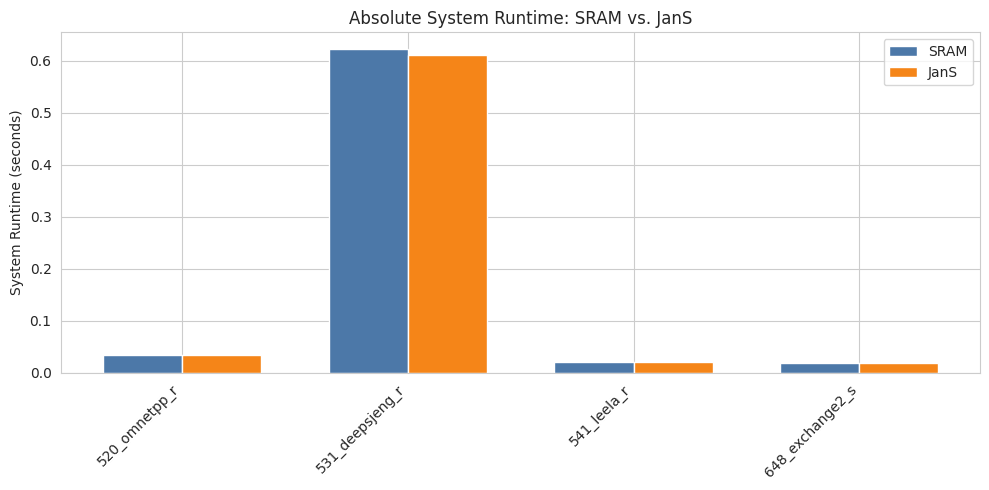

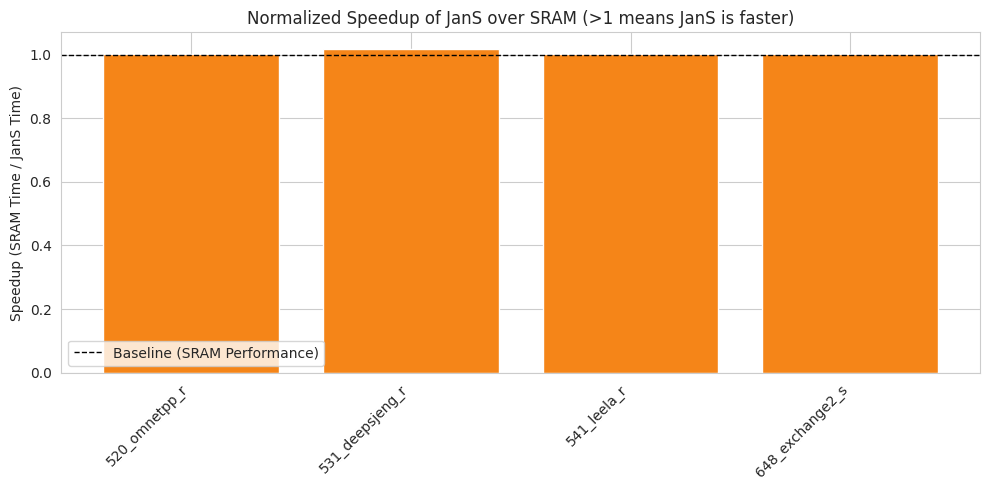

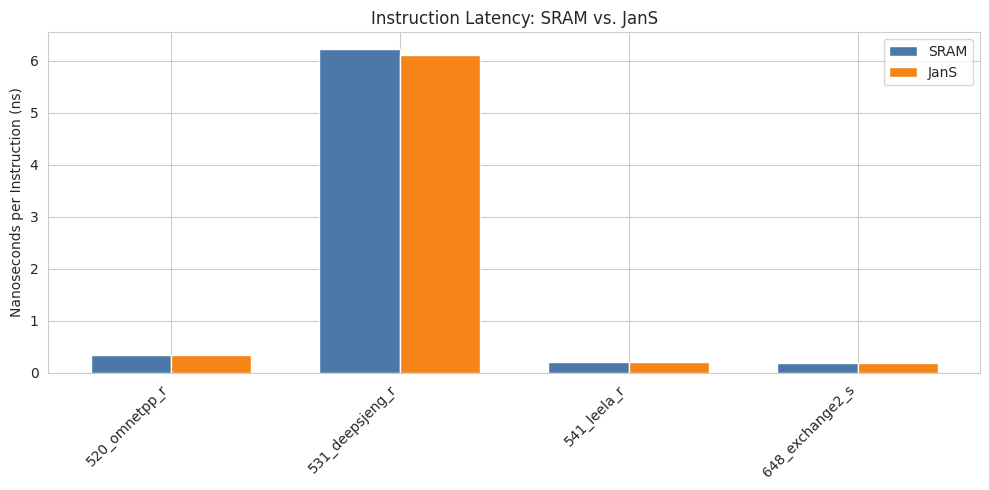

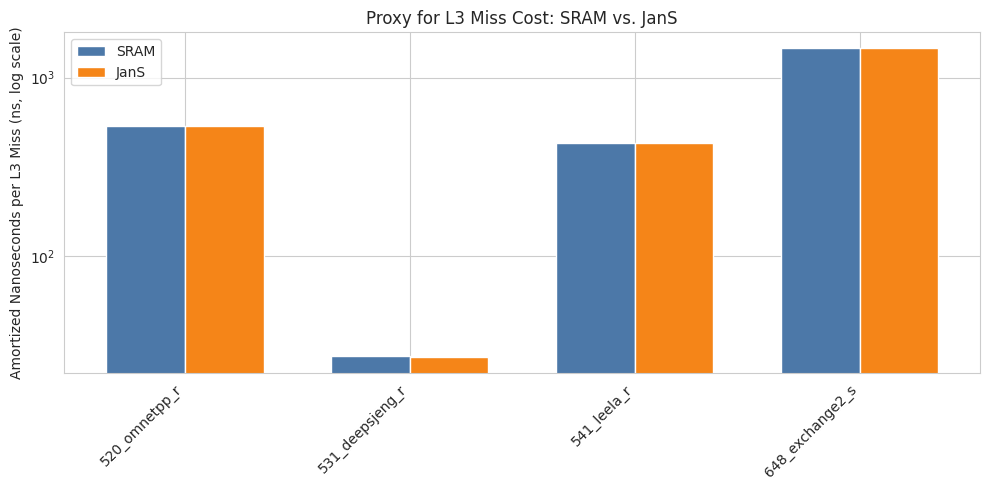

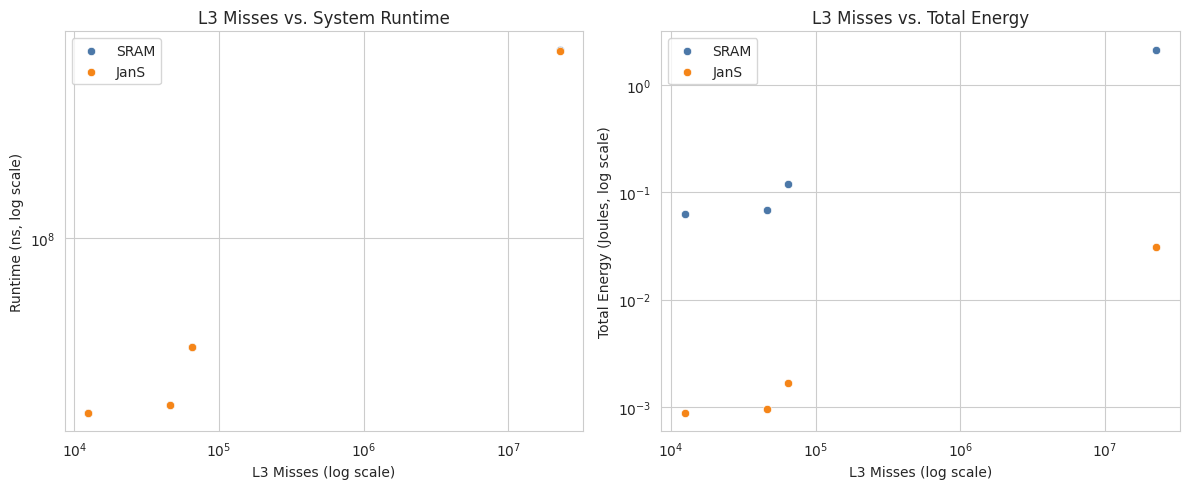

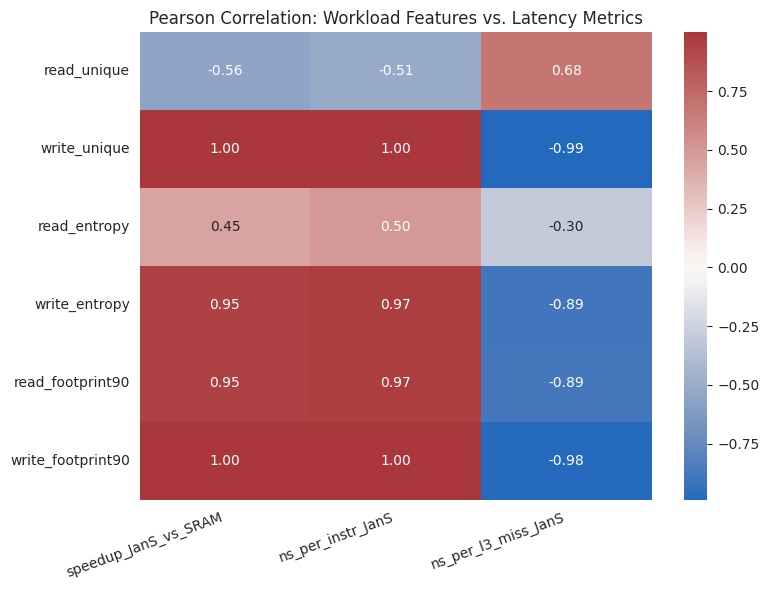


Plotting strongest correlation: 'write_footprint90' vs. 'ns_per_instr_JanS'
Linear Fit: y = 2.86e-07x + 0.268 | R-squared: 1.000


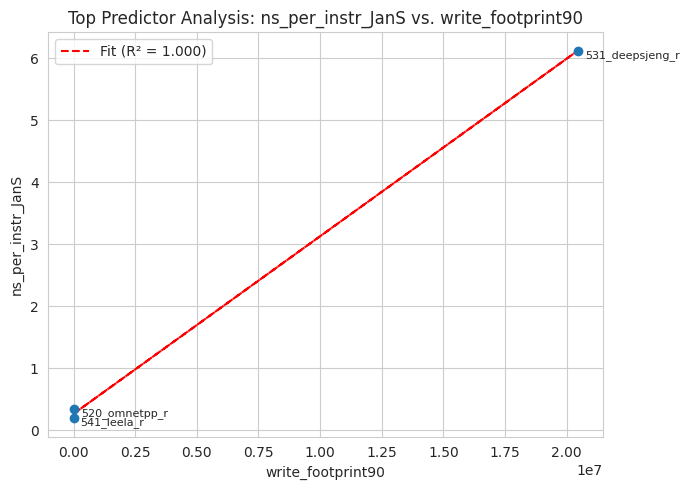


Analysis complete.


In [37]:
# ===== 02_latency_analysis: FEATURES vs. LATENCY METRICS =====
# - Builds on 01_data_exploration by focusing on derived latency metrics.
# - Plots absolute runtime, normalized speedup, ns/instruction, and ns/L3-miss.
# - Generates scatter plots to correlate L3 misses with runtime and energy.
# - Creates a correlation heatmap between workload features and the new latency metrics.
# - Plots an annotated scatter + regression for the strongest feature-latency predictor.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# -------------------
# CONFIG (please edit paths)
# -------------------
# Assumes the same run directory and features file from the previous script.
BASE = Path("/home/skataoka26/COSC_498/miniMXE")
RUN_ID = "spec_roi100_nowarm_sram8MB_rd4_wr2_jans4MB_rd6_wr17_20250919T230616Z"
RUN_DIR = BASE / "results" / RUN_ID
FEATURES_CSV = BASE / "data" / "features.csv"

# Plotting style
C_SRAM = "#4C78A8"
C_JANS = "#F58518"
sns.set_style("whitegrid")
plt.rcParams['figure.dpi'] = 100


# -------------------
# DATA LOADING HELPERS (adapted from previous script)
# -------------------
def num(s):
    """Safely convert a series to numeric."""
    return pd.to_numeric(s, errors="coerce")

def bench_under_to_dot(b):
    """Converts '520_omnetpp_r' to '520.omnetpp_r' for joining."""
    return b.replace("_", ".", 1)

def load_all_data(run_dir, features_csv):
    """Loads and merges energy, summary, and feature data into one DataFrame."""
    print(f"Loading data from: {run_dir}")
    # Load SNIPER outputs
    out_dirs = sorted(run_dir.glob("output_*"))
    if not out_dirs:
        raise FileNotFoundError(f"No 'output_*' directories found in {run_dir}")

    rows = []
    for od in out_dirs:
        try:
            # Read the full CSVs
            summary_full = pd.read_csv(od / "summary.csv")
            energy_full = pd.read_csv(od / "energy_bounds.csv")
            
            # **FIX:** Select only the columns we need to avoid name clashes
            summary = summary_full[["benchmark", "config", "time_ns", "instructions", "l3_misses_db"]].copy()
            energy = energy_full[["benchmark", "config", "energy_exact_J"]].copy()

            # Ensure 'benchmark' column is consistent
            bench_name = od.name.replace("output_", "")
            summary["benchmark"] = summary.get("benchmark", bench_name)
            energy["benchmark"] = energy.get("benchmark", bench_name)
            
            # Merge the selected slices. No suffixes are needed now.
            merged = pd.merge(summary, energy, on=["benchmark", "config"])
            rows.append(merged)
        except Exception as e:
            print(f"[WARN] Failed to process directory {od.name}: {e}")

    if not rows:
        raise RuntimeError("Could not load any valid summary/energy CSVs.")

    df = pd.concat(rows, ignore_index=True)
    df["config"] = df["config"].str.strip()

    # Load features
    features_df = pd.read_csv(features_csv)
    
    # Prepare for merge
    df["bench_feat_key"] = df["benchmark"].apply(bench_under_to_dot)
    features_df["bench_feat_key"] = features_df["benchmark"].astype(str)
    
    # Merge SNIPER data with features
    final_df = pd.merge(df, features_df, on="bench_feat_key", how="left", suffixes=("", "_feat"))
    print(f"Successfully loaded and merged data for {final_df['benchmark'].nunique()} benchmarks.")
    return final_df

# -------------------
# METRIC CALCULATION
# -------------------
def calculate_metrics(df):
    """Pivots the data and calculates derived latency metrics."""
    # Select and pivot necessary columns
    pivot_cols = [
        "time_ns", "instructions", "l3_misses_db", "energy_exact_J"
    ]
    wide_df = df.pivot(index="bench_feat_key", columns="config", values=pivot_cols)
    # Flatten the multi-level column index
    wide_df.columns = [f"{val}_{config}" for val, config in wide_df.columns]
    
    # Re-join with features (one row per benchmark)
    feature_cols = ["read_unique", "write_unique", "read_entropy", "write_entropy", "read_footprint90", "write_footprint90"]
    features_df = df[["bench_feat_key"] + feature_cols].drop_duplicates()
    wide_df = pd.merge(wide_df, features_df, on="bench_feat_key").reset_index()
    wide_df["benchmark"] = wide_df["bench_feat_key"].str.replace(".", "_", 1)
    
    # --- Calculate derived metrics ---
    # 1. Speedup
    wide_df["speedup_JanS_vs_SRAM"] = num(wide_df["time_ns_SRAM"]) / num(wide_df["time_ns_JanS"])

    # 2. Nanoseconds per instruction
    wide_df["ns_per_instr_SRAM"] = num(wide_df["time_ns_SRAM"]) / num(wide_df["instructions_SRAM"])
    wide_df["ns_per_instr_JanS"] = num(wide_df["time_ns_JanS"]) / num(wide_df["instructions_JanS"])

    # 3. Nanoseconds per L3 miss (handle division by zero)
    wide_df["ns_per_l3_miss_SRAM"] = num(wide_df["time_ns_SRAM"]) / num(wide_df["l3_misses_db_SRAM"]).replace(0, np.nan)
    wide_df["ns_per_l3_miss_JanS"] = num(wide_df["time_ns_JanS"]) / num(wide_df["l3_misses_db_JanS"]).replace(0, np.nan)
    
    print("Derived latency metrics calculated.")
    return wide_df.sort_values("benchmark").reset_index(drop=True)

all_data = load_all_data(RUN_DIR, FEATURES_CSV)
metrics_df = calculate_metrics(all_data)

# 2. Generate Plots
##
## PLOT 1: System Runtime (Absolute)
##
plt.figure(figsize=(10, 5))
x = np.arange(len(metrics_df["benchmark"]))
width = 0.35
# Convert ns to seconds for readability
plt.bar(x - width/2, metrics_df["time_ns_SRAM"] / 1e9, width, label="SRAM", color=C_SRAM)
plt.bar(x + width/2, metrics_df["time_ns_JanS"] / 1e9, width, label="JanS", color=C_JANS)
plt.ylabel("System Runtime (seconds)")
plt.title("Absolute System Runtime: SRAM vs. JanS")
plt.xticks(x, metrics_df["benchmark"], rotation=45, ha="right")
plt.legend()
plt.tight_layout()
plt.show()

##
## PLOT 2: Normalized Speedup
##
plt.figure(figsize=(10, 5))
plt.bar(metrics_df["benchmark"], metrics_df["speedup_JanS_vs_SRAM"], color=C_JANS)
plt.axhline(1.0, color='k', linestyle='--', linewidth=1, label="Baseline (SRAM Performance)")
plt.ylabel("Speedup (SRAM Time / JanS Time)")
plt.title("Normalized Speedup of JanS over SRAM (>1 means JanS is faster)")
plt.xticks(rotation=45, ha="right")
plt.legend()
plt.tight_layout()
plt.show()

##
## PLOT 3: Nanoseconds per Instruction
##
plt.figure(figsize=(10, 5))
plt.bar(x - width/2, metrics_df["ns_per_instr_SRAM"], width, label="SRAM", color=C_SRAM)
plt.bar(x + width/2, metrics_df["ns_per_instr_JanS"], width, label="JanS", color=C_JANS)
plt.ylabel("Nanoseconds per Instruction (ns)")
plt.title("Instruction Latency: SRAM vs. JanS")
plt.xticks(x, metrics_df["benchmark"], rotation=45, ha="right")
plt.legend()
plt.tight_layout()
plt.show()

##
## PLOT 4: Nanoseconds per L3 Miss (Log Scale)
##
plt.figure(figsize=(10, 5))
plt.bar(x - width/2, metrics_df["ns_per_l3_miss_SRAM"], width, label="SRAM", color=C_SRAM)
plt.bar(x + width/2, metrics_df["ns_per_l3_miss_JanS"], width, label="JanS", color=C_JANS)
plt.yscale('log')
plt.ylabel("Amortized Nanoseconds per L3 Miss (ns, log scale)")
plt.title("Proxy for L3 Miss Cost: SRAM vs. JanS")
plt.xticks(x, metrics_df["benchmark"], rotation=45, ha="right")
plt.legend()
plt.tight_layout()
plt.show()

##
## PLOT 5: L3 Misses vs. Runtime and Energy (Scatter)
##
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
# Plot 5a: Misses vs. Runtime
sns.scatterplot(data=metrics_df, x="l3_misses_db_SRAM", y="time_ns_SRAM", ax=ax1, color=C_SRAM, label="SRAM")
sns.scatterplot(data=metrics_df, x="l3_misses_db_JanS", y="time_ns_JanS", ax=ax1, color=C_JANS, label="JanS")
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel("L3 Misses (log scale)")
ax1.set_ylabel("Runtime (ns, log scale)")
ax1.set_title("L3 Misses vs. System Runtime")
ax1.legend()
# Plot 5b: Misses vs. Energy
sns.scatterplot(data=metrics_df, x="l3_misses_db_SRAM", y="energy_exact_J_SRAM", ax=ax2, color=C_SRAM, label="SRAM")
sns.scatterplot(data=metrics_df, x="l3_misses_db_JanS", y="energy_exact_J_JanS", ax=ax2, color=C_JANS, label="JanS")
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set_xlabel("L3 Misses (log scale)")
ax2.set_ylabel("Total Energy (Joules, log scale)")
ax2.set_title("L3 Misses vs. Total Energy")
ax2.legend()
plt.tight_layout()
plt.show()

##
## PLOT 6: Correlation Heatmap (Features vs. Latency Metrics)
##
feature_cols = ["read_unique", "write_unique", "read_entropy", "write_entropy", "read_footprint90", "write_footprint90"]
latency_metrics = ["speedup_JanS_vs_SRAM", "ns_per_instr_JanS", "ns_per_l3_miss_JanS"]
corr_df = metrics_df[feature_cols + latency_metrics].corr()
# Isolate the feature-metric relationships
corr_subset = corr_df.loc[feature_cols, latency_metrics]

plt.figure(figsize=(8, 6))
sns.heatmap(corr_subset, annot=True, fmt=".2f", cmap="vlag", center=0)
plt.title("Pearson Correlation: Workload Features vs. Latency Metrics")
plt.xticks(rotation=20, ha="right")
plt.tight_layout()
plt.show()

##
## PLOT 7: Scatter + Regression for Top Predictor
##
# Find the feature-metric pair with the highest absolute correlation
top_corr = corr_subset.unstack().abs().idxmax()
top_feature, top_metric = top_corr[1], top_corr[0]
print(f"\nPlotting strongest correlation: '{top_feature}' vs. '{top_metric}'")

# Plotting
plot_df = metrics_df[[top_feature, top_metric, "benchmark"]].dropna()
x_vals, y_vals = plot_df[top_feature], plot_df[top_metric]

# Calculate linear regression and R-squared
coeffs = np.polyfit(x_vals, y_vals, 1)
p = np.poly1d(coeffs)
y_pred = p(x_vals)
r2 = 1 - (np.sum((y_vals - y_pred)**2) / np.sum((y_vals - np.mean(y_vals))**2))
print(f"Linear Fit: y = {coeffs[0]:.3g}x + {coeffs[1]:.3g} | R-squared: {r2:.3f}")

plt.figure(figsize=(7, 5))
plt.scatter(x_vals, y_vals, zorder=5)
plt.plot(x_vals, p(x_vals), "r--", zorder=4, label=f"Fit (R² = {r2:.3f})")

# Annotate points
for i, txt in enumerate(plot_df["benchmark"]):
    plt.annotate(txt, (x_vals.iloc[i], y_vals.iloc[i]), xytext=(5, -5), textcoords='offset points', fontsize=8)

plt.xlabel(top_feature)
plt.ylabel(top_metric)
plt.title(f"Top Predictor Analysis: {top_metric} vs. {top_feature}")
plt.legend()
plt.tight_layout()
plt.show()

print("\nAnalysis complete.")

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# --- CONFIGURATION ---
# The ID of the simulation run you want to analyze
RUN_ID = "spec_roi100_warm30_sram8MB_rd4_wr2_jans4MB_rd6_wr17_20250919T002148Z"

# The specific benchmark you want to see plots for
BENCH_TO_PLOT = "541_leela_r"

# ❗ IMPORTANT: Set this to the absolute path of your project's main folder
PROJECT_BASE_DIR = Path("/home/skataoka26/COSC_498/miniMXE")
# --------------------

# --- PATHS (Derived from the base path above) ---
try:
    RUN_DIR = PROJECT_BASE_DIR / "results" / RUN_ID
    FEATURES_FILE = PROJECT_BASE_DIR / "data" / "features.csv"

    # Quick check to make sure the run directory exists
    if not RUN_DIR.is_dir():
        raise FileNotFoundError
    print(f"✅ Found run directory: {RUN_DIR}")
except FileNotFoundError:
    print(f"❌ ERROR: Could not find the run directory!")
    print(f"   Checked for: {RUN_DIR}")
    print("   Please make sure PROJECT_BASE_DIR is set correctly.")
    
energy_dfs = []
summary_dfs = []

# Find all benchmark output directories (e.g., 'output_541_leela_r')
benchmark_dirs = sorted(list(RUN_DIR.glob("output_*")))

if not benchmark_dirs:
    print(f"❌ ERROR: No 'output_*' directories found in {RUN_DIR}")
else:
    for bench_dir in benchmark_dirs:
        benchmark_name = bench_dir.name.replace("output_", "")

        # Load energy data
        try:
            df = pd.read_csv(bench_dir / "energy_bounds.csv")
            df["benchmark"] = benchmark_name
            energy_dfs.append(df)
        except FileNotFoundError:
            print(f"- Skipping energy data for {benchmark_name} (file not found)")

        # Load summary data
        try:
            df = pd.read_csv(bench_dir / "summary.csv")
            df["benchmark"] = benchmark_name
            summary_dfs.append(df)
        except FileNotFoundError:
            print(f"- Skipping summary data for {benchmark_name} (file not found)")

    # Combine all the individual files into two big DataFrames
    energy_df = pd.concat(energy_dfs, ignore_index=True)
    summary_df = pd.concat(summary_dfs, ignore_index=True)

    print("\n✅ Data loaded successfully!")
    print(f"Found data for {summary_df['benchmark'].nunique()} benchmarks.")
    
# --- Clean up the Summary DataFrame ---
# Convert time from nanoseconds to seconds if needed
if "time_s" not in summary_df.columns and "time_ns" in summary_df.columns:
    summary_df["time_s"] = summary_df["time_ns"] / 1e9

# --- Clean up the Energy DataFrame ---
# Calculate a 'best' energy value (use exact if available, otherwise use the midpoint of the bounds)
energy_df["energy_best_J"] = energy_df["energy_exact_J"].fillna(
    (energy_df["energy_lower_J"] + energy_df["energy_upper_J"]) / 2
)
# Make sure the 'config' column is sorted correctly in plots (SRAM then JanS)
sram_jans_category = pd.CategoricalDtype(categories=["SRAM", "JanS"], ordered=True)
summary_df["config"] = summary_df["config"].astype(sram_jans_category)
energy_df["config"] = energy_df["config"].astype(sram_jans_category)

print("✅ Data cleaned and processed.")
summary_df.head()

✅ Found run directory: /home/skataoka26/COSC_498/miniMXE/results/spec_roi100_warm30_sram8MB_rd4_wr2_jans4MB_rd6_wr17_20250919T002148Z

✅ Data loaded successfully!
Found data for 2 benchmarks.
✅ Data cleaned and processed.


timestamp_utc      benchmark  n_m config  instructions       cycles  \
0  2025-09-19T16:37:43Z  520_omnetpp_r  100   SRAM   11144971931  10846044930   
1  2025-09-19T16:37:43Z  520_omnetpp_r  100   JanS   11144971931  11138259496   
2  2025-09-19T16:38:29Z  520_omnetpp_r  100   SRAM   11144971931  10846044930   
3  2025-09-19T16:38:29Z  520_omnetpp_r  100   JanS   11144971931  11138259496   
4  2025-09-19T16:38:44Z  520_omnetpp_r  100   SRAM   11144971931  10846044930   

    ipc     time_ns       l3_acc     l3_miss  ...  l3_write_hits  \
0  1.03  4077460500  109946159.0  43271520.0  ...            NaN   
1  1.00  4187315600  112621689.0  49820802.0  ...            NaN   
2  1.03  4077460500  109946159.0  43271520.0  ...            NaN   
3  1.00  4187315600  112621689.0  49820802.0  ...            NaN   
4  1.03  4077460500  109946159.0  43271520.0  ...            NaN   

   l3_writebacks                                             outdir  \
0            NaN  /home/skataoka26/COSC_498/miniMXE/results/spec...   
1            NaN  /home/skataoka26/COSC_498/miniMXE/results/spec...   
2            NaN                                                NaN   
3            NaN                                                NaN   
4            NaN                                                NaN   

   l3_acc_text l3_miss_text  l3_accesses_db  l3_misses_db l3_evictions  \
0          NaN          NaN             NaN           NaN          NaN   
1          NaN          NaN             NaN           NaN          NaN   
2          NaN          NaN             NaN           NaN          NaN   
3          NaN          NaN             NaN           NaN          NaN   
4          NaN          NaN             NaN           NaN          NaN   

   l3_misses_custom    time_s  
0               NaN  4.077460  
1               NaN  4.187316  
2               NaN  4.077460  
3               NaN  4.187316  
4               NaN  4.077460  

[5 rows x 25 columns]

# Multi-run

In [42]:
# --- BAR PLOTS: add to your multi_run_analysis.py ---

import numpy as np
import matplotlib.pyplot as plt

def _order(df, by=None, ascending=True, default="benchmark"):
    if by is None: by = default
    cols = [c for c in [by, default] if c in df.columns]
    return df.sort_values(cols, ascending=ascending)

def plot_per_run_runtime_bars(bench_metrics_all, run_id, sort_by="benchmark", topk=None):
    """Grouped bars of absolute runtime (seconds) per benchmark for one run."""
    df = bench_metrics_all[bench_metrics_all["run_id"]==run_id].copy()
    df = df.dropna(subset=["T_SRAM_s","T_JanS_s"])
    if df.empty:
        print(f"[no data] {run_id}"); return
    df = _order(df, by=sort_by, ascending=(sort_by!="speedup_SRAM_over_JanS"))
    if isinstance(topk, int): df = df.head(topk)

    x = np.arange(len(df))
    w = 0.42
    plt.figure(figsize=(max(8, len(df)*0.5), 4.5))
    plt.bar(x - w/2, df["T_SRAM_s"],  width=w, label="SRAM")
    plt.bar(x + w/2, df["T_JanS_s"],  width=w, label="JanS")
    plt.ylabel("Runtime (s)")
    plt.title(f"Runtime by benchmark — {run_id}")
    plt.xticks(x, df["benchmark"], rotation=45, ha="right")
    plt.legend()
    plt.tight_layout(); plt.show()

def plot_per_run_energy_bars(bench_metrics_all, run_id, sort_by="benchmark", topk=None):
    """Grouped bars of LLC energy (J) per benchmark for one run."""
    df = bench_metrics_all[bench_metrics_all["run_id"]==run_id].copy()
    df = df.dropna(subset=["E_SRAM_J","E_JanS_J"])
    if df.empty:
        print(f"[no data] {run_id}"); return
    df = _order(df, by=sort_by, ascending=(sort_by!="energy_ratio_JanS_over_SRAM"))
    if isinstance(topk, int): df = df.head(topk)

    x = np.arange(len(df))
    w = 0.42
    plt.figure(figsize=(max(8, len(df)*0.5), 4.5))
    plt.bar(x - w/2, df["E_SRAM_J"], width=w, label="SRAM")
    plt.bar(x + w/2, df["E_JanS_J"], width=w, label="JanS")
    plt.ylabel("LLC Energy (J)")
    plt.title(f"Energy by benchmark — {run_id}")
    plt.xticks(x, df["benchmark"], rotation=45, ha="right")
    plt.legend()
    plt.tight_layout(); plt.show()

def plot_per_run_speedup_bars(bench_metrics_all, run_id, sort_by="speedup_SRAM_over_JanS", topk=None):
    """Bars of speedup (SRAM time / JanS time) per benchmark for one run; >1 ⇒ JanS faster."""
    df = bench_metrics_all[bench_metrics_all["run_id"]==run_id].copy()
    df = df.dropna(subset=["speedup_SRAM_over_JanS"])
    if df.empty:
        print(f"[no data] {run_id}"); return
    df = _order(df, by=sort_by, ascending=False)
    if isinstance(topk, int): df = df.head(topk)

    x = np.arange(len(df))
    plt.figure(figsize=(max(8, len(df)*0.5), 4.5))
    plt.bar(x, df["speedup_SRAM_over_JanS"])
    plt.axhline(1.0, linestyle="--", linewidth=1)
    plt.ylabel("Speedup (SRAM time / JanS time)")
    plt.title(f"JanS speedup by benchmark — {run_id}")
    plt.xticks(x, df["benchmark"], rotation=45, ha="right")
    plt.tight_layout(); plt.show()

def plot_per_run_energy_ratio_bars(bench_metrics_all, run_id, sort_by="energy_ratio_JanS_over_SRAM", topk=None):
    """Bars of energy ratio (JanS / SRAM) per benchmark for one run; <1 ⇒ JanS uses less energy."""
    df = bench_metrics_all[bench_metrics_all["run_id"]==run_id].copy()
    df = df.dropna(subset=["energy_ratio_JanS_over_SRAM"])
    if df.empty:
        print(f"[no data] {run_id}"); return
    df = _order(df, by=sort_by, ascending=True)
    if isinstance(topk, int): df = df.head(topk)

    x = np.arange(len(df))
    plt.figure(figsize=(max(8, len(df)*0.5), 4.5))
    plt.bar(x, df["energy_ratio_JanS_over_SRAM"])
    plt.axhline(1.0, linestyle="--", linewidth=1)
    plt.ylabel("Energy Ratio (JanS / SRAM)")
    plt.title(f"Energy ratio by benchmark — {run_id}")
    plt.xticks(x, df["benchmark"], rotation=45, ha="right")
    plt.tight_layout(); plt.show()

def plot_aggregate_by_run_bars(bench_metrics_all):
    """
    One bar per run (sram/jans pair): median speedup, median energy ratio, and JanS win rate.
    Produces three separate normal bar charts.
    """
    df = bench_metrics_all.copy()
    df["jans_faster"] = df["speedup_SRAM_over_JanS"] > 1.0
    agg = (df.groupby(["run_id","sram_MB","jans_MB"])
             .agg(median_speedup=("speedup_SRAM_over_JanS","median"),
                  median_energy_ratio=("energy_ratio_JanS_over_SRAM","median"),
                  winrate=("jans_faster","mean"),
                  n_benches=("benchmark","nunique"))
             .reset_index())
    labels = [f"S{s}MB/J{j}MB\n{rid.split('_')[-1]}" for rid,s,j in zip(agg["run_id"], agg["sram_MB"], agg["jans_MB"])]

    # median speedup
    plt.figure(figsize=(max(8, len(agg)*0.6), 4.2))
    plt.bar(np.arange(len(agg)), agg["median_speedup"])
    plt.axhline(1.0, linestyle="--", linewidth=1)
    plt.ylabel("Median Speedup")
    plt.title("Per-run median speedup (SRAM time / JanS time)")
    plt.xticks(range(len(agg)), labels, rotation=45, ha="right")
    plt.tight_layout(); plt.show()

    # median energy ratio
    plt.figure(figsize=(max(8, len(agg)*0.6), 4.2))
    plt.bar(np.arange(len(agg)), agg["median_energy_ratio"])
    plt.axhline(1.0, linestyle="--", linewidth=1)
    plt.ylabel("Median Energy Ratio (JanS / SRAM)")
    plt.title("Per-run median energy ratio")
    plt.xticks(range(len(agg)), labels, rotation=45, ha="right")
    plt.tight_layout(); plt.show()

    # win rate
    plt.figure(figsize=(max(8, len(agg)*0.6), 4.2))
    plt.bar(np.arange(len(agg)), agg["winrate"])
    plt.ylabel("JanS Win Rate")
    plt.title("Per-run fraction of benches where JanS is faster")
    plt.xticks(range(len(agg)), labels, rotation=45, ha="right")
    plt.tight_layout(); plt.show()

def plot_bench_across_runs_bars(bench_metrics_all, bench="541_leela_r", metric="speedup_SRAM_over_JanS"):
    """
    Single benchmark across all runs; one bar per (S,J) capacity pair.
    metric ∈ {"speedup_SRAM_over_JanS","energy_ratio_JanS_over_SRAM","T_SRAM_s","T_JanS_s","E_SRAM_J","E_JanS_J"}
    """
    df = bench_metrics_all[bench_metrics_all["benchmark"]==bench].copy()
    if metric not in df.columns:
        raise ValueError(f"metric '{metric}' not found in bench_metrics_all")
    df = df.dropna(subset=[metric])
    if df.empty:
        print(f"[no data] {bench} / {metric}"); return
    df = df.sort_values(["sram_MB","jans_MB"])
    labels = [f"S{int(s)} J{int(j)}" for s,j in zip(df["sram_MB"], df["jans_MB"])]

    plt.figure(figsize=(max(8, len(df)*0.6), 4.2))
    plt.bar(np.arange(len(df)), df[metric])
    if metric in ("speedup_SRAM_over_JanS","energy_ratio_JanS_over_SRAM"):
        plt.axhline(1.0, linestyle="--", linewidth=1)
    plt.ylabel(metric)
    plt.title(f"{bench}: {metric} across capacity pairs")
    plt.xticks(range(len(df)), labels, rotation=0)
    plt.tight_layout(); plt.show()


In [43]:
energy_all, summary_all, features_df = load_all_runs(FEATURES_CSV)
bench_metrics_all = build_bench_metrics_across_runs(energy_all)

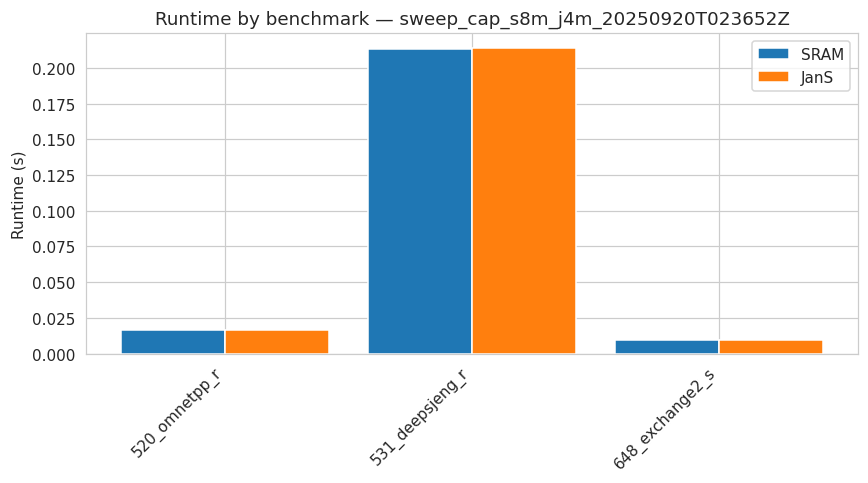

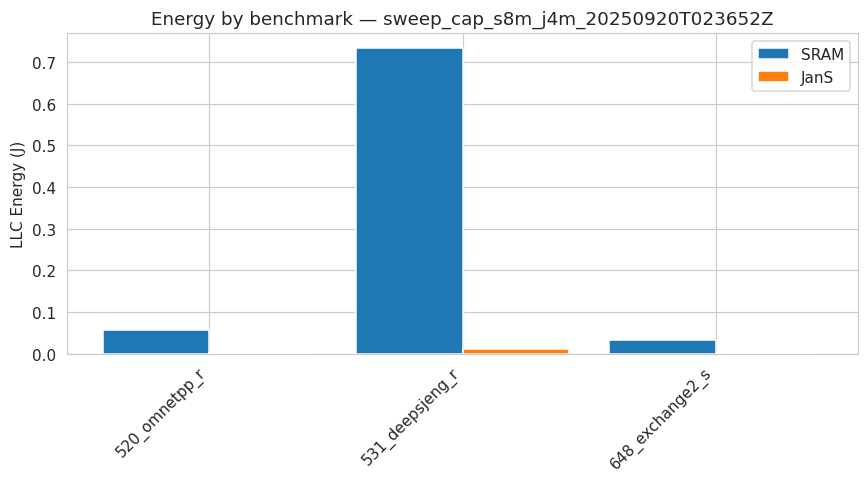

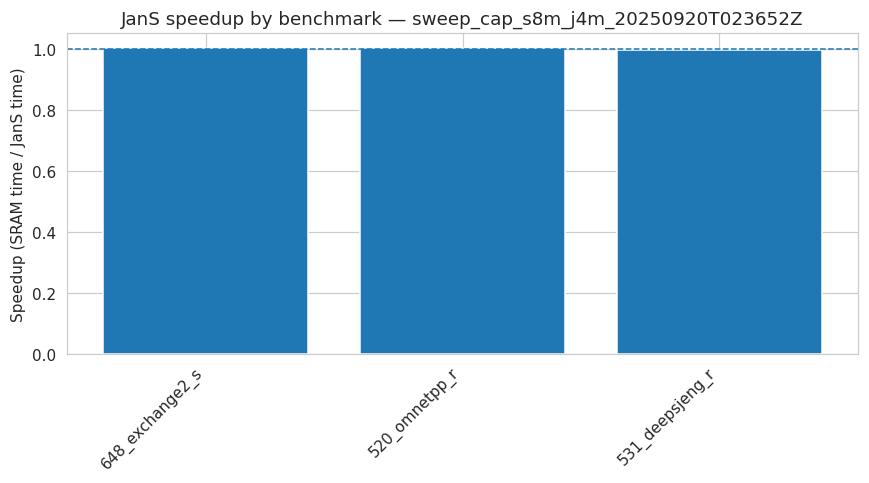

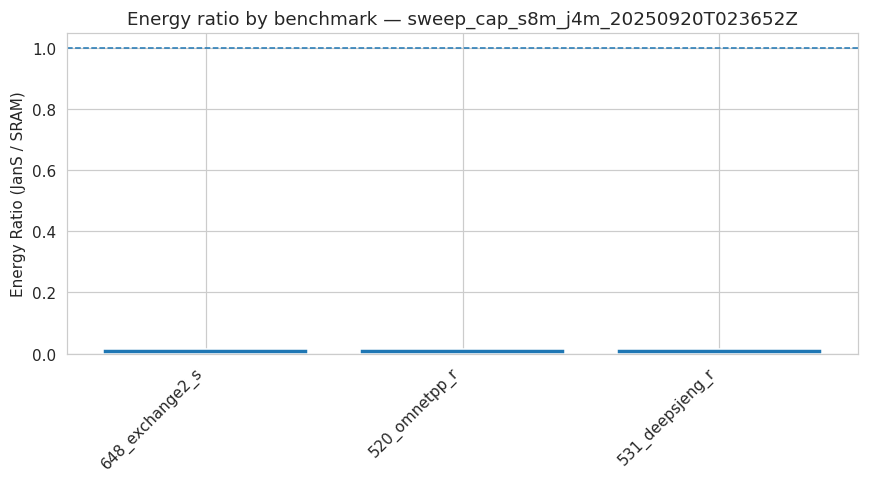

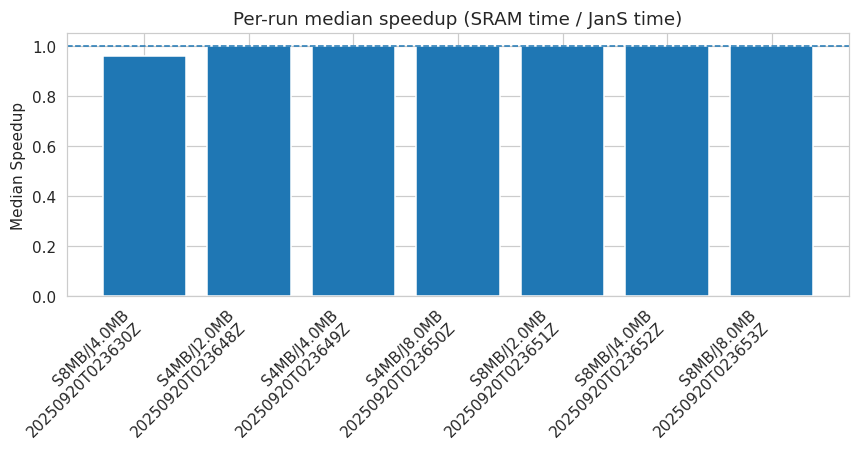

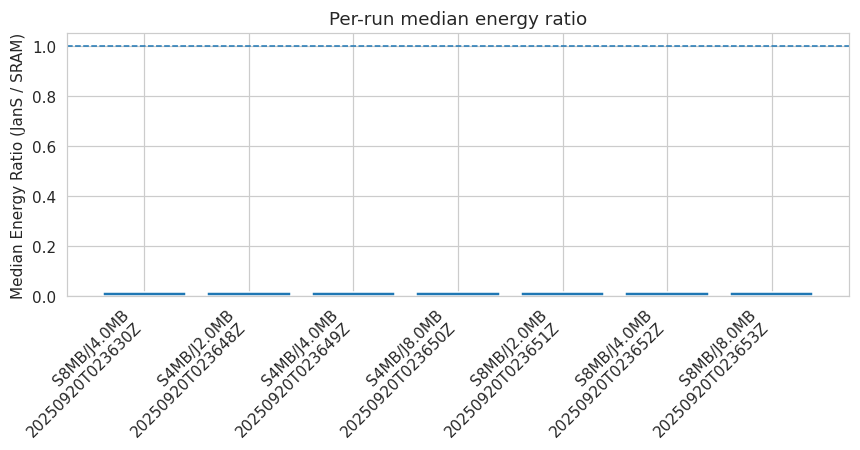

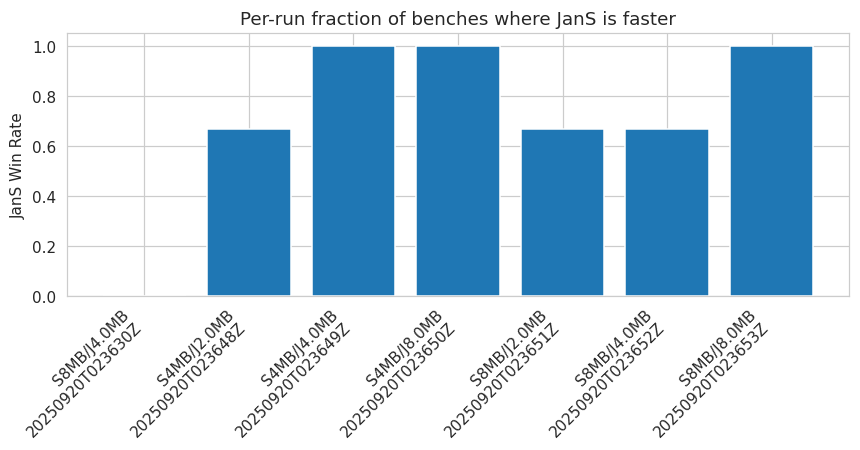

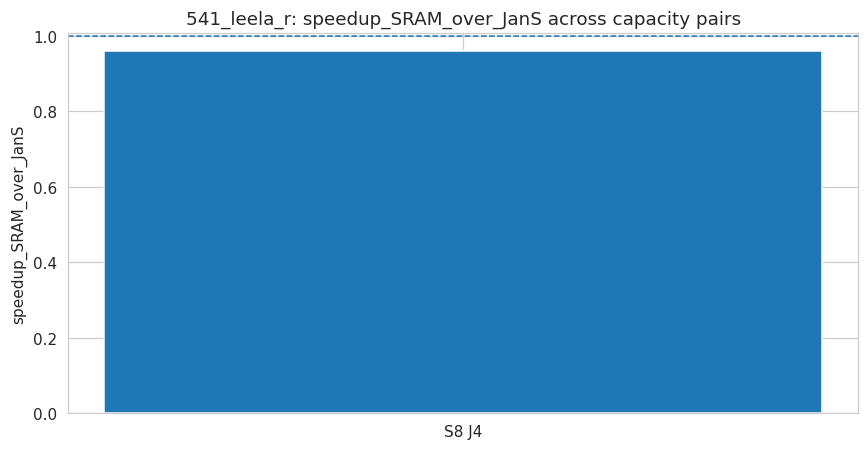

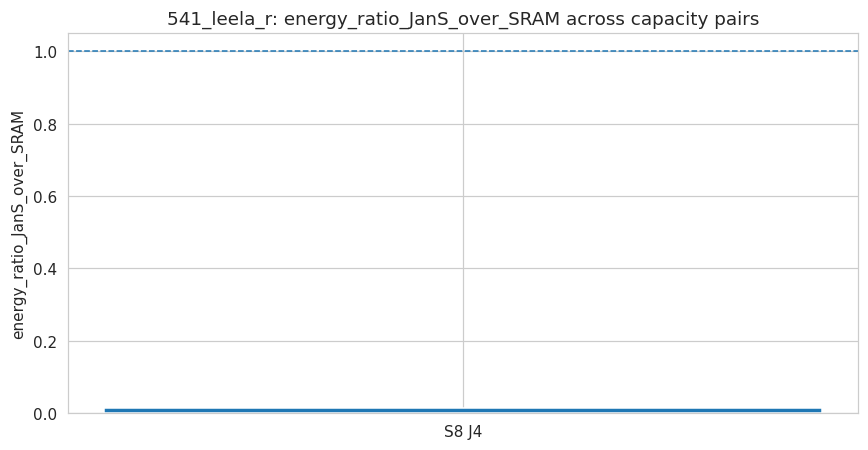

In [44]:
# Pick a run id from your list:
rid = "sweep_cap_s8m_j4m_20250920T023652Z"

# Per-run grouped bars (normal bar charts)
plot_per_run_runtime_bars(bench_metrics_all, rid, sort_by="benchmark")
plot_per_run_energy_bars(bench_metrics_all,  rid, sort_by="benchmark")
plot_per_run_speedup_bars(bench_metrics_all, rid, sort_by="speedup_SRAM_over_JanS", topk=20)
plot_per_run_energy_ratio_bars(bench_metrics_all, rid, sort_by="energy_ratio_JanS_over_SRAM", topk=20)

# Aggregated “one bar per run” summaries
plot_aggregate_by_run_bars(bench_metrics_all)

# One benchmark across all capacity pairs (still normal bars)
plot_bench_across_runs_bars(bench_metrics_all, bench="541_leela_r", metric="speedup_SRAM_over_JanS")
plot_bench_across_runs_bars(bench_metrics_all, bench="541_leela_r", metric="energy_ratio_JanS_over_SRAM")